# Sección 13: Análisis de Funciones y Graficación

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import symbols, diff, solve, limit, oo, Eq, Abs, degree, div

# Configuración
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

## 1. Puntos Críticos y Prueba de la Primera Derivada

**Definición**: Un punto crítico ocurre cuando $f'(x) = 0$ o $f'(x)$ no existe.

### Implementación con clasificación de extremos

=== Puntos Críticos y Prueba de la Primera Derivada ===
Función: f(x) = x**3 - 12*x
Primera derivada: f'(x) = 3*x**2 - 12

Puntos críticos encontrados:
x = -2: Máximo local
x = 2: Mínimo local


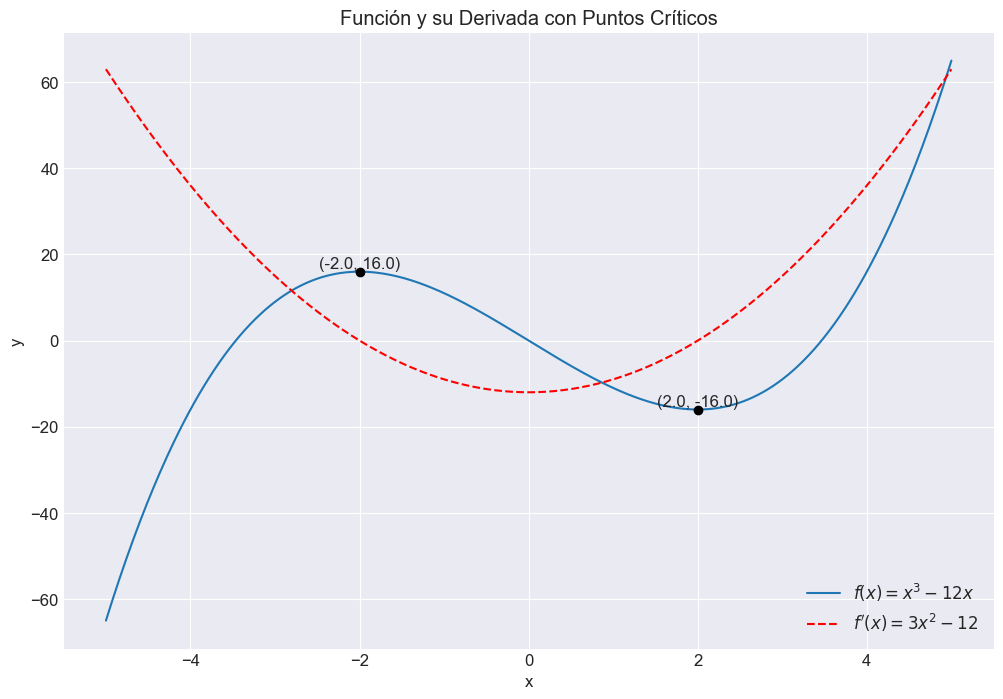

In [17]:
def critical_points_analysis():
    x = symbols('x')
    f = x**3 - 12*x  # Función de ejemplo
    
    # Paso 1: Encontrar la primera derivada
    f_prime = diff(f, x)
    
    # Paso 2: Encontrar puntos críticos
    critical_points = solve(Eq(f_prime, 0), x)
    
    # Paso 3: Prueba de la primera derivada
    test_intervals = []
    behavior = []
    
    # Ordenar puntos críticos y agregar extremos del dominio si es necesario
    sorted_critical = sorted(critical_points)
    test_values = [pt - 1 for pt in sorted_critical] + [pt + 1 for pt in sorted_critical]
    
    # Evaluar el signo de f' en cada intervalo
    for i in range(len(sorted_critical) + 1):
        if i == 0:
            test_val = sorted_critical[0] - 1 if len(sorted_critical) > 0 else -1
            interval = (-oo, sorted_critical[0]) if len(sorted_critical) > 0 else (-oo, oo)
        elif i == len(sorted_critical):
            test_val = sorted_critical[-1] + 1 if len(sorted_critical) > 0 else 1
            interval = (sorted_critical[-1], oo) if len(sorted_critical) > 0 else (-oo, oo)
        else:
            test_val = (sorted_critical[i-1] + sorted_critical[i])/2
            interval = (sorted_critical[i-1], sorted_critical[i])
        
        sign = f_prime.subs(x, test_val)
        if sign > 0: # type: ignore
            behavior.append("Creciente")
        elif sign < 0: # type: ignore
            behavior.append("Decreciente")
        else:
            behavior.append("Constante")
        test_intervals.append(interval)
    
    # Clasificar puntos críticos
    extremum_types = []
    for i, pt in enumerate(sorted_critical):
        left_behavior = behavior[i]
        right_behavior = behavior[i+1]
        
        if left_behavior == "Creciente" and right_behavior == "Decreciente":
            extremum_types.append("Máximo local")
        elif left_behavior == "Decreciente" and right_behavior == "Creciente":
            extremum_types.append("Mínimo local")
        else:
            extremum_types.append("Punto de silla")
    
    print("=== Puntos Críticos y Prueba de la Primera Derivada ===")
    print(f"Función: f(x) = {f}")
    print(f"Primera derivada: f'(x) = {f_prime}")
    print("\nPuntos críticos encontrados:")
    for pt, ext_type in zip(sorted_critical, extremum_types):
        print(f"x = {pt}: {ext_type}")
    
    # Visualización
    x_vals = np.linspace(-5, 5, 500)
    f_lamb = sp.lambdify(x, f, 'numpy')
    f_prime_lamb = sp.lambdify(x, f_prime, 'numpy')
    
    plt.figure()
    plt.plot(x_vals, f_lamb(x_vals), label=f'$f(x) = {sp.latex(f)}$')
    plt.plot(x_vals, f_prime_lamb(x_vals), 'r--', label=f"$f'(x) = {sp.latex(f_prime)}$")
    
    for pt in sorted_critical:
        y_val = f_lamb(pt)
        plt.scatter([pt], [y_val], color='black', zorder=5)
        plt.text(pt, y_val, f'({pt:.1f}, {y_val:.1f})', ha='center', va='bottom')
    
    plt.title('Función y su Derivada con Puntos Críticos')
    plt.legend()
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

critical_points_analysis()

## 2. Puntos de Inflexión y Prueba de la Segunda Derivada

**Definición**: Un punto de inflexión ocurre donde la concavidad cambia ($f''(x) = 0$ o no existe).

### Implementación con análisis de concavidad


=== Puntos de Inflexión y Prueba de la Segunda Derivada ===
Función: f(x) = x**4 - 4*x**3
Segunda derivada: f''(x) = 12*x**2 - 24*x

Puntos de inflexión encontrados:
x = 0
x = 2

Prueba de la segunda derivada para puntos críticos:
x = 0: Prueba no concluyente
x = 3: Mínimo local (f'' > 0)


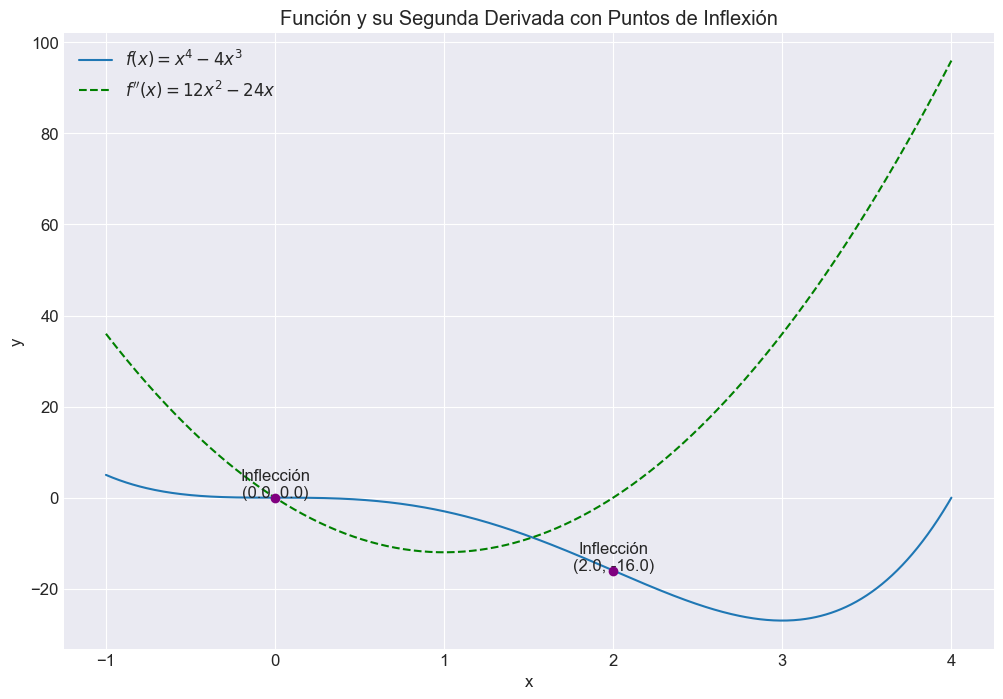

In [18]:
def inflection_points_analysis():
    x = symbols('x')
    f = x**4 - 4*x**3  # Función de ejemplo
    
    # Paso 1: Encontrar primera y segunda derivada
    f_prime = diff(f, x)
    f_double_prime = diff(f_prime, x)
    
    # Paso 2: Encontrar puntos de inflexión
    inflection_candidates = solve(Eq(f_double_prime, 0), x)
    
    # Verificar cambio de concavidad
    inflection_points = []
    for candidate in inflection_candidates:
        # Evaluar a izquierda y derecha del candidato
        left_val = f_double_prime.subs(x, candidate - 0.1)
        right_val = f_double_prime.subs(x, candidate + 0.1)
        # Cambio de signo
        if left_val * right_val < 0:  # type: ignore
            inflection_points.append(candidate)
    
    # Paso 3: Prueba de la segunda derivada para extremos
    critical_points = solve(Eq(f_prime, 0), x)
    extremum_types = []
    for pt in critical_points:
        second_deriv_val = f_double_prime.subs(x, pt)
        if second_deriv_val > 0: # type: ignore
            extremum_types.append("Mínimo local (f'' > 0)")
        elif second_deriv_val < 0: # type: ignore
            extremum_types.append("Máximo local (f'' < 0)")
        else:
            extremum_types.append("Prueba no concluyente")
    
    print("\n=== Puntos de Inflexión y Prueba de la Segunda Derivada ===")
    print(f"Función: f(x) = {f}")
    print(f"Segunda derivada: f''(x) = {f_double_prime}")
    print("\nPuntos de inflexión encontrados:")
    for pt in inflection_points:
        print(f"x = {pt}")
    
    print("\nPrueba de la segunda derivada para puntos críticos:")
    for pt, ext_type in zip(critical_points, extremum_types):
        print(f"x = {pt}: {ext_type}")
    
    # Visualización de concavidad
    x_vals = np.linspace(-1, 4, 500)
    f_lamb = sp.lambdify(x, f, 'numpy')
    f_double_prime_lamb = sp.lambdify(x, f_double_prime, 'numpy')
    
    plt.figure()
    plt.plot(x_vals, f_lamb(x_vals), label=f'$f(x) = {sp.latex(f)}$')
    plt.plot(x_vals, f_double_prime_lamb(x_vals), 'g--', label=f"$f''(x) = {sp.latex(f_double_prime)}$")
    
    for pt in inflection_points:
        y_val = f_lamb(pt)
        plt.scatter([pt], [y_val], color='purple', zorder=5)
        plt.text(pt, y_val, f'Inflección\n({pt:.1f}, {y_val:.1f})', ha='center')
    
    plt.title('Función y su Segunda Derivada con Puntos de Inflexión')
    plt.legend()
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

inflection_points_analysis()

## 3. Asíntotas y Comportamiento en los Extremos

**Tipos de asíntotas**:
- Verticales: $x = a$ donde $\lim_{x \to a} f(x) = \pm\infty$
- Horizontales: $y = L$ donde $\lim_{x \to \pm\infty} f(x) = L$
- Oblicuas: $y = mx + b$ para funciones racionales donde grado(num) = grado(den) + 1

### Implementación completa


=== Análisis de Asíntotas ===
Función: f(x) = (3*x**2 + 2)/(x - 1)

Asíntotas verticales:
x = 1

Asíntotas horizontales:

Asíntotas oblicuas:
y = 3*x + 3


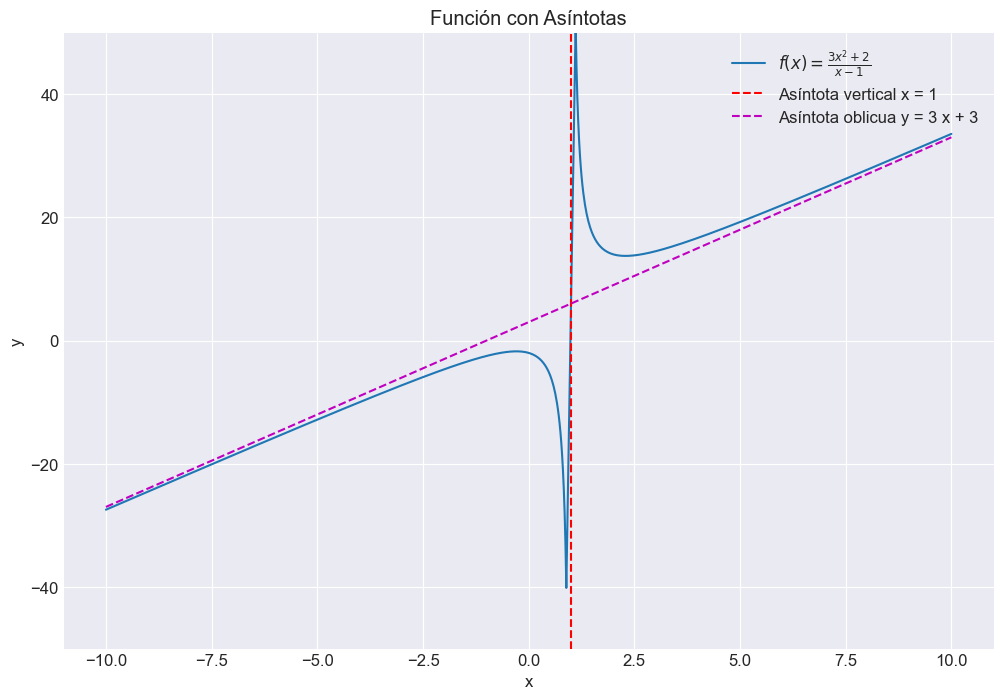

In [19]:
def asymptotes_analysis():
    x = symbols('x')
    f = (3*x**2 + 2)/(x - 1)  # Función de ejemplo
    
    # Asíntotas verticales
    denominator = f.as_numer_denom()[1]
    vertical_asymptotes = solve(Eq(denominator, 0), x)
    
    # Asíntotas horizontales
    limit_at_inf = limit(f, x, oo)
    limit_at_neg_inf = limit(f, x, -oo)
    horizontal_asymptotes = []
    if limit_at_inf == limit_at_neg_inf and Abs(limit_at_inf) < oo:
        horizontal_asymptotes.append(limit_at_inf)
    
    # Asíntotas oblicuas (solo si no hay horizontales)
    oblique_asymptotes = []
    if not horizontal_asymptotes:
        degree_num = degree(f.as_numer_denom()[0], x)
        degree_den = degree(f.as_numer_denom()[1], x)
        
        if degree_num == degree_den + 1:
            quotient, remainder = div(f.as_numer_denom()[0], f.as_numer_denom()[1])
            oblique_asymptotes.append(quotient)
    
    print("\n=== Análisis de Asíntotas ===")
    print(f"Función: f(x) = {f}")
    print("\nAsíntotas verticales:")
    for va in vertical_asymptotes:
        print(f"x = {va}")
    
    print("\nAsíntotas horizontales:")
    for ha in horizontal_asymptotes:
        print(f"y = {ha}")
    
    print("\nAsíntotas oblicuas:")
    for oa in oblique_asymptotes:
        print(f"y = {oa}")
    
    # Visualización
    x_vals = np.linspace(-10, 10, 1000)
    x_vals = x_vals[~np.isclose(x_vals, 1, atol=0.1)]  # Excluir cercanías de la asíntota vertical
    
    f_lamb = sp.lambdify(x, f, 'numpy')
    y_vals = f_lamb(x_vals)
    
    plt.figure()
    plt.plot(x_vals, y_vals, label=f'$f(x) = {sp.latex(f)}$')
    
    # Dibujar asíntotas
    if vertical_asymptotes:
        plt.axvline(x=vertical_asymptotes[0], color='r', linestyle='--', label=f'Asíntota vertical x = {vertical_asymptotes[0]}')
    
    if horizontal_asymptotes:
        plt.axhline(y=horizontal_asymptotes[0], color='g', linestyle='--', label=f'Asíntota horizontal y = {horizontal_asymptotes[0]}')
    elif oblique_asymptotes:
        oa_func = oblique_asymptotes[0]
        oa_lamb = sp.lambdify(x, oa_func, 'numpy')
        plt.plot(x_vals, oa_lamb(x_vals), 'm--', label=f'Asíntota oblicua y = {sp.latex(oa_func)}')
    
    plt.title('Función con Asíntotas')
    plt.legend()
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.ylim(-50, 50)  # Limitar rango para mejor visualización
    plt.show()

asymptotes_analysis()

## 4. Graficación Completa de Funciones

**Proceso completo**:
1. Encontrar dominio y puntos de discontinuidad
2. Calcular intersecciones con ejes
3. Encontrar y clasificar puntos críticos
4. Determinar intervalos de crecimiento/decrecimiento
5. Encontrar puntos de inflexión y concavidad
6. Identificar asíntotas
7. Analizar comportamiento en los extremos

### Implementación integrada

=== Análisis Completo de Función ===
Función a analizar: f(x) = (x**3 - 3*x)/(x**2 - 4)

1. Dominio y discontinuidades:
Discontinuidades en x = [-2, 2]

2. Intersecciones con ejes:
Intersección con eje x: [0, -sqrt(3), sqrt(3)]
Intersección con eje y: 0

3. Puntos críticos:
Puntos críticos en x = [-sqrt(9/2 - sqrt(33)/2), sqrt(9/2 - sqrt(33)/2), -sqrt(sqrt(33)/2 + 9/2), sqrt(sqrt(33)/2 + 9/2)]

5. Puntos de inflexión:
Puntos de inflexión en x = [0, -2*sqrt(3)*I, 2*sqrt(3)*I]

7. Comportamiento en los extremos:
Cuando x → ∞: oo
Cuando x → -∞: -oo


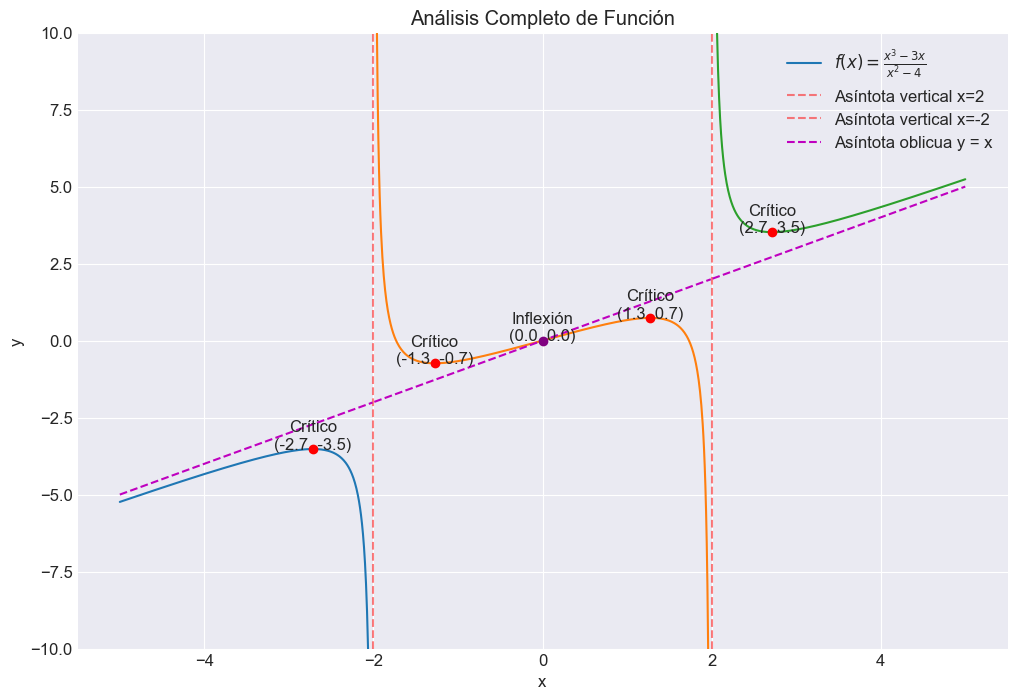

In [20]:
def full_function_analysis():
    x = symbols('x')
    f = (x**3 - 3*x)/(x**2 - 4)  # Función racional interesante
    
    print("=== Análisis Completo de Función ===")
    print(f"Función a analizar: f(x) = {f}\n")
    
    # 1. Dominio y discontinuidades
    denominator = f.as_numer_denom()[1]
    discontinuities = solve(Eq(denominator, 0), x)
    print("1. Dominio y discontinuidades:")
    print(f"Discontinuidades en x = {discontinuities}")
    
    # 2. Intersecciones con ejes
    x_intercepts = solve(Eq(f, 0), x)
    y_intercept = f.subs(x, 0) if 0 not in discontinuities else "Indefinido"
    print("\n2. Intersecciones con ejes:")
    print(f"Intersección con eje x: {x_intercepts}")
    print(f"Intersección con eje y: {y_intercept}")
    
    # 3. Puntos críticos
    f_prime = diff(f, x).simplify()
    critical_points = solve(Eq(f_prime, 0), x)
    print("\n3. Puntos críticos:")
    print(f"Puntos críticos en x = {critical_points}")
    
    # 4. Crecimiento/decrecimiento (usar prueba primera derivada)
    # [Código similar a critical_points_analysis()]
    
    # 5. Puntos de inflexión y concavidad
    f_double_prime = diff(f_prime, x).simplify()
    inflection_points = solve(Eq(f_double_prime, 0), x)
    print("\n5. Puntos de inflexión:")
    print(f"Puntos de inflexión en x = {inflection_points}")
    
    # 6. Asíntotas
    # [Código similar a asymptotes_analysis()]
    
    # 7. Comportamiento en extremos
    limit_at_inf = limit(f, x, oo)
    limit_at_neg_inf = limit(f, x, -oo)
    print("\n7. Comportamiento en los extremos:")
    print(f"Cuando x → ∞: {limit_at_inf}")
    print(f"Cuando x → -∞: {limit_at_neg_inf}")
    
    # Visualización completa
    x_vals_left = np.linspace(-5, -2.01, 500)
    x_vals_mid = np.linspace(-1.99, 1.99, 500)
    x_vals_right = np.linspace(2.01, 5, 500)

    f_lamb = sp.lambdify(x, f, 'numpy')

    plt.figure(figsize=(12, 8))
    plt.plot(x_vals_left, f_lamb(x_vals_left), label=f'$f(x) = {sp.latex(f)}$')
    plt.plot(x_vals_mid, f_lamb(x_vals_mid))
    plt.plot(x_vals_right, f_lamb(x_vals_right))

    # Marcar características importantes
    for pt in critical_points:
        if pt not in discontinuities and sp.im(pt) == 0:
            y_val = f_lamb(pt)
            plt.scatter([pt], [y_val], color='red', zorder=5)
            plt.text(pt, y_val, f'Crítico\n({pt:.1f}, {y_val:.1f})', ha='center')

    for pt in inflection_points:
        if pt not in discontinuities and sp.im(pt) == 0:
            y_val = f_lamb(pt)
            plt.scatter([pt], [y_val], color='purple', zorder=5)
            plt.text(pt, y_val, f'Inflexión\n({pt:.1f}, {y_val:.1f})', ha='center')

    # Dibujar asíntotas
    plt.axvline(x=2, color='r', linestyle='--', alpha=0.5, label='Asíntota vertical x=2')
    plt.axvline(x=-2, color='r', linestyle='--', alpha=0.5, label='Asíntota vertical x=-2')

    # Asíntota oblicua
    quotient, remainder = div(f.as_numer_denom()[0], f.as_numer_denom()[1])
    oa_lamb = sp.lambdify(x, quotient, 'numpy')
    plt.plot(x_vals_left, oa_lamb(x_vals_left), 'm--', label=f'Asíntota oblicua y = {sp.latex(quotient)}')
    plt.plot(x_vals_mid, oa_lamb(x_vals_mid), 'm--')
    plt.plot(x_vals_right, oa_lamb(x_vals_right), 'm--')

    plt.title('Análisis Completo de Función')
    plt.legend()
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.ylim(-10, 10)
    plt.show()

full_function_analysis()

## Resumen Teórico Completo

| **Concepto**                | **Definición/Prueba**                                                                 | **Interpretación Gráfica**                          |
|-----------------------------|--------------------------------------------------------------------------------------|----------------------------------------------------|
| **Puntos críticos**         | $f'(x) = 0$ o no existe                                                              | Posibles máximos, mínimos o puntos de silla        |
| **Prueba primera derivada** | Signo de $f'$ cambia de + a - → máximo<br>de - a + → mínimo                          | Cambio en dirección de la función                  |
| **Puntos de inflexión**     | $f''(x) = 0$ y cambia de signo                                                       | Cambio en concavidad (de cóncavo a convexo o viceversa) |
| **Prueba segunda derivada** | $f''(x) > 0$ → mínimo local<br>$f''(x) < 0$ → máximo local                           | Concavidad en el punto crítico                     |
| **Asíntotas verticales**    | $\lim_{x \to a} f(x) = \pm\infty$                                                    | Comportamiento explosivo cerca de $x = a$          |
| **Asíntotas horizontales**  | $\lim_{x \to \pm\infty} f(x) = L$                                                    | Comportamiento a largo plazo                       |
| **Asíntotas oblicuas**      | $y = mx + b$ donde $m = \lim_{x \to \infty} \frac{f(x)}{x}$, $b = \lim_{x \to \infty} [f(x) - mx]$ | Aproximación lineal en infinito para funciones racionales |